This is the second notebook for this course. The question for this second asks which Borough in the city of New York the housing department should focus in, given the complaint type identified in the previous section. Therefore, the the dataset will be condensed to just the heating and hot water issues, and then the Borough will be identified.

In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='58548218-d78e-4251-95d2-67ed44feff5d', project_access_token='p-17588375ba270ce7d8e2f7d2651fde17fb64de66')
#pc = project.project_context

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import types
import pandas as pd
#from botocore.client import Config
#import ibm_boto3

#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
#client_2e2f0b3c376d4e9586d0fa475f0d4cf6 = ibm_boto3.client(service_name='s3',
    #ibm_api_key_id='ODq1RiDzqvK_ZHr2wJ_StMrShRahDkxYnRtHr-0ER_Th',
    #ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    #config=Config(signature_version='oauth'),
    #endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

#body = client_2e2f0b3c376d4e9586d0fa475f0d4cf6.get_object(Bucket='edx1-donotdelete-pr-88qux6w8ehqfye',Key='311_Service_Requests_from_2010_to_Present.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_1 = pd.read_csv(body, low_memory=True)
df_data_1 = pd.read_csv('desktop/edx IBM/311_Service_Requests_from_2010_to_Present-2.csv', parse_dates=True)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,12,13,14,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,44087643,10/18/2019 11:13:58 PM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11232.0,4116 8 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.646018,-73.998627,"(40.646017602662596, -73.99862705348652)"
1,44092484,10/18/2019 11:13:54 PM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10011.0,195 10 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746770,-74.004850,"(40.746769679818215, -74.0048504742897)"
2,44089759,10/18/2019 11:13:49 PM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10458.0,2420 WEBSTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.859312,-73.893579,"(40.8593120723137, -73.8935789282356)"
3,44084158,10/18/2019 11:13:36 PM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10467.0,3150 ROCHAMBEAU AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874538,-73.880364,"(40.87453769186875, -73.88036367689082)"
4,44086430,10/18/2019 11:12:55 PM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10457.0,4215 PARK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.847863,-73.899225,"(40.847863491304004, -73.89922497624548)"


In [2]:
#Dropped as they are unnecessary for the current analysis
df_data_1.drop(['Agency', 'Agency Name','Descriptor','Cross Street 1', 'Cross Street 2','Intersection Street 1', 'Intersection Street 2', 'Address Type',
               'Landmark', 'Facility Type','Due Date','Resolution Action Updated Date', 'Community Board', 'BBL','X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment'], axis=1, inplace=True)

In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878742 entries, 0 to 5878741
Data columns (total 15 columns):
Unique Key                int64
Created Date              object
Closed Date               object
Complaint Type            object
Location Type             object
Incident Zip              float64
Incident Address          object
Street Name               object
City                      object
Status                    object
Resolution Description    object
Borough                   object
Latitude                  float64
Longitude                 float64
Location                  object
dtypes: float64(3), int64(1), object(11)
memory usage: 672.8+ MB


In [4]:
#df_data_1['Unique Key'] = df_data_1['Unique Key'].astype(str)
#df_data_1['Incident Zip'] = df_data_1['Incident Zip'].astype(str)
#df_data_1['Closed Date'] = pd.to_datetime(df_data_1['Closed Date'], errors='ignore')
#df_data_1['Created Date'] = pd.to_datetime(df_data_1['Created Date'])

In [5]:
#The two heating and hot water categories are separated out and recombined into a singke dataframe
heat_df = df_data_1.loc[df_data_1['Complaint Type'] == 'HEATING']
heat_df2 = df_data_1.loc[df_data_1['Complaint Type'] == 'HEAT/HOT WATER']
heating_df = heat_df.append(heat_df2)
heating_df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Resolution Description,Borough,Latitude,Longitude,Location
3203066,27612012,03/10/2014 12:00:00 AM,03/12/2014 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11204.0,1941 BAY RIDGE AVENUE,BAY RIDGE AVENUE,BROOKLYN,Closed,The complaint you filed is a duplicate of a co...,BROOKLYN,40.614998,-73.989468,"(40.6149982706852, -73.9894681623791)"
3203068,27612009,03/10/2014 12:00:00 AM,03/10/2014 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,10462.0,850 MORRIS PARK AVENUE,MORRIS PARK AVENUE,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.846336,-73.860730,"(40.84633580720356, -73.86073043230446)"
3203069,27612003,03/10/2014 12:00:00 AM,03/12/2014 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,10451.0,940 GRAND CONCOURSE,GRAND CONCOURSE,BRONX,Closed,The complaint you filed is a duplicate of a co...,BRONX,40.828789,-73.921632,"(40.82878868206092, -73.92163186542135)"
3203073,27611997,03/10/2014 12:00:00 AM,03/12/2014 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11225.0,1171 PRESIDENT STREET,PRESIDENT STREET,BROOKLYN,Closed,The complaint you filed is a duplicate of a co...,BROOKLYN,40.668136,-73.951693,"(40.66813589027507, -73.95169302261705)"
3203074,27611996,03/10/2014 12:00:00 AM,03/12/2014 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,10031.0,469 WEST 147 STREET,WEST 147 STREET,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.826214,-73.945891,"(40.826214349536365, -73.94589093829818)"


In [6]:
#The Bronx appears to have the most, by a small margin. But the large number of "Unspecified" Boroughs requries more breakdown
heating_df['Borough'].value_counts()

BRONX            572225
BROOKLYN         545831
MANHATTAN        400686
Unspecified      282917
QUEENS           229608
STATEN ISLAND     17524
Name: Borough, dtype: int64

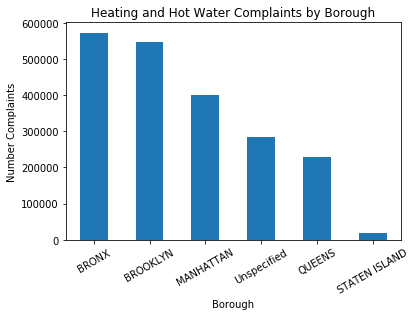

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
heating_df['Borough'].value_counts().plot(kind='bar', rot=30)
plt.xlabel('Borough')
plt.ylabel('Number Complaints')
plt.title('Heating and Hot Water Complaints by Borough')
plt.show()

In [8]:
#Identifying unspecified Boroughs by street name is probably not efficient
heating_df['Street Name'].value_counts()

GRAND CONCOURSE             36047
BROADWAY                    23626
OCEAN AVENUE                17946
ARDEN STREET                15848
MORRIS AVENUE               15826
ST NICHOLAS AVENUE          14994
AMSTERDAM AVENUE            11880
ELMHURST AVENUE             11002
BOYNTON AVENUE              10821
DR M L KING JR BOULEVARD    10055
OCEAN PARKWAY               10016
WALTON AVENUE                9604
BAILEY AVENUE                9571
RIVERSIDE DRIVE              9241
LINDEN BOULEVARD             9190
SEDGWICK AVENUE              9130
DECATUR AVENUE               9121
NOSTRAND AVENUE              8868
CRESTON AVENUE               8708
SHERMAN AVENUE               7904
BEDFORD AVENUE               7581
SHERIDAN AVENUE              7507
EASTERN PARKWAY              7474
3 AVENUE                     7394
WALLACE AVENUE               7314
2 AVENUE                     7208
DAVIDSON AVENUE              6855
FT WASHINGTON AVENUE         6720
NEW YORK AVENUE              6677
VALENTINE AVEN

In [9]:
#Zipcode also not efficient
heating_df['Incident Zip'].value_counts()

11226.0    65766
10467.0    63000
10458.0    62422
10468.0    55202
10453.0    55035
10452.0    47628
10457.0    43498
10040.0    43400
10031.0    42835
10456.0    42206
11225.0    40908
11213.0    38768
10462.0    37796
10463.0    36247
10032.0    34785
11212.0    33174
10472.0    32367
10460.0    31487
10033.0    30724
11233.0    29488
11203.0    27998
11221.0    27410
11216.0    25440
11207.0    25341
10451.0    25222
10034.0    24708
10025.0    23721
10466.0    22860
10027.0    22621
11208.0    22614
           ...  
10044.0      326
10309.0      309
11362.0      305
11426.0      297
11004.0      245
10007.0      223
10006.0      193
10308.0      189
10005.0      179
10307.0      163
10282.0      155
10004.0      151
11001.0      120
10280.0       72
11697.0       65
11040.0       51
11109.0       23
10069.0       20
11005.0        8
10162.0        5
10803.0        4
10041.0        3
10020.0        2
10169.0        2
11430.0        2
10045.0        1
10103.0        1
10121.0       

In [10]:
#For four of the five Boroughs, the city is listed as the same as the borough. Queens appears to be the exception.
heating_df['City'].value_counts()

BRONX                  654862
BROOKLYN               633691
NEW YORK               455170
STATEN ISLAND           20824
Jamaica                 20604
Elmhurst                18286
Flushing                18222
Astoria                 18005
Far Rockaway            11177
Ridgewood               10470
Woodside                10087
Corona                   9551
Jackson Heights          8976
JAMAICA                  8559
Forest Hills             6757
ASTORIA                  6331
Rego Park                5763
FLUSHING                 5694
Sunnyside                5404
Kew Gardens              4393
RIDGEWOOD                4132
FAR ROCKAWAY             3944
Queens Village           3574
ELMHURST                 3531
Rockaway Park            3478
South Richmond Hill      3169
WOODSIDE                 3045
Long Island City         3028
Ozone Park               2951
Richmond Hill            2830
                        ...  
Middle Village           1014
LONG ISLAND CITY          943
Howard Bea

In [11]:
#This take just those columsn with Borough Unspecified and gives a count by city. This is to ensure there are no overlaps in count where the borough is specified. 
heating_df.loc[heating_df['Borough'] == 'Unspecified'].groupby(heating_df['City']).count()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Resolution Description,Borough,Latitude,Longitude,Location
City,,,,,,,,,,,,,,,
ARVERNE,589,589,568,589,589,589,589,589,589,589,589,589,589,589,589
ASTORIA,3381,3381,3287,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381
BAYSIDE,236,236,231,236,236,236,236,236,236,236,236,236,236,236,236
BELLEROSE,45,45,39,45,45,45,45,45,45,45,45,45,45,45,45
BREEZY POINT,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
BRONX,88585,88585,87303,88585,88585,88585,88585,88585,88585,88585,88577,88585,88585,88585,88585
BROOKLYN,93388,93388,92200,93388,93388,93388,93388,93388,93388,93388,93387,93388,93388,93388,93388
CAMBRIA HEIGHTS,127,127,121,127,127,127,127,127,127,127,127,127,127,127,127
COLLEGE POINT,225,225,219,225,225,225,225,225,225,225,225,225,225,225,225


In [13]:
#Break outs of each Borough where Borough is specified
heating_Queens = heating_df[heating_df.Borough=='QUEENS']
heating_Manhattan = heating_df[heating_df.Borough=='MANHATTAN']
heating_Bronx = heating_df[heating_df.Borough=='BRONX']
heating_StatenIsl = heating_df[heating_df.Borough=='STATEN ISLAND']
heating_Brooklyn = heating_df[heating_df.Borough=='BROOKLYN']
heating_Unspecified = heating_df[heating_df.Borough=='Unspecified']

In [14]:
#Another look at value counts by city where borough is unspecified
heating_Unspecified['City'].value_counts()

BROOKLYN               93388
BRONX                  88585
NEW YORK               59095
JAMAICA                 5020
STATEN ISLAND           3462
ASTORIA                 3381
FLUSHING                3154
RIDGEWOOD               2273
FAR ROCKAWAY            2040
WOODSIDE                1773
ELMHURST                1696
JACKSON HEIGHTS         1479
CORONA                  1398
FOREST HILLS            1340
REGO PARK               1134
SOUTH RICHMOND HILL     1005
QUEENS VILLAGE           928
SUNNYSIDE                877
OZONE PARK               835
RICHMOND HILL            778
HOLLIS                   776
WOODHAVEN                770
EAST ELMHURST            752
SPRINGFIELD GARDENS      675
SAINT ALBANS             660
SOUTH OZONE PARK         606
KEW GARDENS              599
ARVERNE                  589
LONG ISLAND CITY         454
ROSEDALE                 416
OAKLAND GARDENS          397
MASPETH                  363
ROCKAWAY PARK            361
BAYSIDE                  236
COLLEGE POINT 

In [18]:
#Remaining samples where both borough and city are unspecified.
heating_Unspecified['City'].isnull().sum()

269

In [15]:
#Total count where both Borough and City are specified for the top three boroughs
print(len(heating_Bronx))
heating_Bronx = heating_Bronx.append(heating_Unspecified.loc[heating_Unspecified['City'] == 'BRONX'])
print(len(heating_Bronx))

572225
660810


In [16]:
print(len(heating_Brooklyn))
heating_Brooklyn = heating_Brooklyn.append(heating_Unspecified.loc[heating_Unspecified['City'] == 'BROOKLYN'])
print(len(heating_Brooklyn))

545831
639219


In [17]:
print(len(heating_Manhattan))
heating_Manhattan = heating_Manhattan.append(heating_Unspecified.loc[heating_Unspecified['City'] == 'NEW YORK'])
print(len(heating_Manhattan))

400686
459781


In [22]:
#@hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='58548218-d78e-4251-95d2-67ed44feff5d', project_access_token='p-17588375ba270ce7d8e2f7d2651fde17fb64de66')
#pc = project.project_context
#project.save_data(file_name='heating_Bronx.csv', data=heating_Bronx.to_csv())

{'file_name': 'heating_Bronx.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'edx1-donotdelete-pr-88qux6w8ehqfye',
 'asset_id': 'ce2d008a-fd3a-4ffa-ae3b-34e24e0fbab4'}

CONCLUDING REMARKS: The question asks which Borough the agency should focus on based on the complaint type identified in the previous section (Heating anad Hot water). An initial look at value counts by Borough suggests that the Bronx has the greatest number of heating and hot water complaints. However, the significant number of complaints in an "Unspecified" Borough warrants greater investigation. Since the city is still listed for most unspecified borough rows, those rows can be appended to the separated Borough dataframes to get a number for the top three Boroughs. The remaining rows with city also missing (269) is not enough to affect the choice of Borough, which remains the Bronx.